# Levi Boswell

## Research question/interests

With the current information from this dataset dating all the way back to ruffly 1970 and all the way up to the current. I am intrested in seeing and extracting possible patterns in the data that would be helpful in predicting the possible fufture rate of the inflation.

1. Is canada's strategy more or less effective then other similar countries? why?
    - breaking down the data to see how effective canada position is against other similar countries
    - creating a graph plot and extracting patterns from particular time points to determine weather our strategies are improving.
2. Does the G7 nations strategies perform in comparision to other nations?
    - this data set has G7, EU, and G20 also as catagories which we can use to help understand similair patterns that will holfully help explain lighlty why the G7 is performing the way it does.

In [91]:
import pandas as pd 
import numpy as np
datfrm = pd.read_csv('./../data/raw/Inflationdataset.csv')
datfrm.columns.values[6] = "MEAN CPI"
datfrm.groupby("LOCATION").mean()




C:\Users\Levi\AppData\Local\Temp\ipykernel_25708\3470515689.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datfrm.groupby("LOCATION").mean()


,MEAN CPI
LOCATION,
ARG,49.374443
AUS,28.548883
AUT,33.188253
BEL,36.756986
BRA,184.208346
CAN,26.856924
CHE,36.054033
CHL,45.816214
CHN,40.980606


# EDA 
Finding and exploring information that could be useful

In [92]:
#viausl import 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt

In [93]:
datfrm = pd.read_csv('./../data/raw/Inflationdataset.csv')
datfrm.columns.values[6] = "CPI"
datfrm.describe()

,CPI
count,293470.000000
mean,36.528518
std,77.123971
min,-100.000000
25%,3.028452
50%,12.800525
75%,67.415548
max,6821.312000


In [94]:
datfrm.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI,Flag Codes
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070,NaN
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801,NaN
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540,NaN
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470,NaN
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195,NaN


In [95]:
datfrm.shape

(293470, 8)

In [96]:
datfrm.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'CPI', 'Flag Codes'],
      dtype='object')

In [97]:
datfrm.nunique(axis=0)

LOCATION          52
INDICATOR          1
SUBJECT            4
MEASURE            2
FREQUENCY          3
TIME            1745
CPI           246286
Flag Codes         1
dtype: int64

In [98]:
## drop colunms that arn't needed 
dat_droped = datfrm.drop( axis=1,columns='Flag Codes')
dat_droped.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195


In [99]:
#get canadain stats
dat_loc_cpi_CAD = dat_droped[dat_droped['LOCATION'] == 'CAN']
dat_loc_cpi_CAD.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
518,CAN,CPI,ENRG,AGRWTH,A,1962,-0.436681
519,CAN,CPI,ENRG,AGRWTH,A,1963,-1.608187
520,CAN,CPI,ENRG,AGRWTH,A,1964,0.371471
521,CAN,CPI,ENRG,AGRWTH,A,1965,0.074019
522,CAN,CPI,ENRG,AGRWTH,A,1966,1.183432


In [100]:
#see date format
dat2drop = dat_loc_cpi_CAD[['TIME','CPI']]
dat2drop.max()

dat2drop.reset_index(0)
dat2drop.head(-1)

,TIME,CPI
518,1962,-0.436681
519,1963,-1.608187
520,1964,0.371471
521,1965,0.074019
522,1966,1.183432
...,...,...
197827,Jul-22,118.400400
197828,Aug-22,118.592100
197829,Sep-22,119.053200
197830,Oct-22,119.403400


In [101]:
#dates format changes based on how how far back one goes
grouped  = dat2drop.groupby(dat2drop['TIME'])
df2 = grouped.get_group('1985-Q1')
df2

,TIME,CPI
8255,1985-Q1,5.727798
8499,1985-Q1,3.363454
8931,1985-Q1,3.621170
134075,1985-Q1,3.437004
156050,1985-Q1,44.873150
156298,1985-Q1,48.610050
156734,1985-Q1,48.986040
156982,1985-Q1,49.417770


In [115]:
#get all data by date monthly
#as I am more interested in most current to date data

#Energy
group_by_subject_Energy =  dat_loc_cpi_CAD.groupby(dat_loc_cpi_CAD['SUBJECT'])
df_g1 = group_by_subject_Energy.get_group('ENRG')
df_g1 = df_g1.groupby(df_g1['FREQUENCY']).get_group('M')
df_g1 = df_g1.reset_index()
df_g1
#Food
group_by_subject_Food = dat_loc_cpi_CAD.groupby(dat_loc_cpi_CAD['SUBJECT'])
df_g2 = group_by_subject_Food.get_group('FOOD')
df_g2 = df_g2.groupby(df_g2['FREQUENCY']).get_group("M")
df_g2

#food-energy total
group_by_subject_Food_ENRG = dat_loc_cpi_CAD.groupby(dat_loc_cpi_CAD['SUBJECT'])
df_g3 = group_by_subject_Food_ENRG.get_group('TOT_FOODENRG')
df_g3 = df_g3.groupby(df_g3['FREQUENCY']).get_group("M")
df_g3

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
114243,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Jan-62,-0.094080
114244,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Feb-62,-0.094080
114245,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Mar-62,0.000000
114246,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Apr-62,0.648302
114247,CAN,CPI,TOT_FOODENRG,AGRWTH,M,May-62,0.584942
...,...,...,...,...,...,...,...
197828,CAN,CPI,TOT_FOODENRG,IDX2015,M,Aug-22,118.592100
197829,CAN,CPI,TOT_FOODENRG,IDX2015,M,Sep-22,119.053200
197830,CAN,CPI,TOT_FOODENRG,IDX2015,M,Oct-22,119.403400
197831,CAN,CPI,TOT_FOODENRG,IDX2015,M,Nov-22,119.519100


In [103]:
#convert Month-YY -> month-YYYY
def convertDateTime(dataFrame_col):
    date =list()
    for time in dataFrame_col:
        f = str.split(time, '-')
        n = int(f[1])
        if(n <= 22 and n < 1000):
            n += 2000       
        elif(n > 22 and n < 1000):
            n += 1900
        date.append(f"{f[0]}-{n}")
    return date




In [116]:
#energy
df_g1["TIME"] = convertDateTime(df_g1["TIME"])
df_g1

#food
df_g2['TIME'] = convertDateTime(df_g2['TIME'])
df_g2

#total food-energy
df_g3['TIME'] = convertDateTime(df_g3['TIME'])
df_g3

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
114243,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Jan-1962,-0.094080
114244,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Feb-1962,-0.094080
114245,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Mar-1962,0.000000
114246,CAN,CPI,TOT_FOODENRG,AGRWTH,M,Apr-1962,0.648302
114247,CAN,CPI,TOT_FOODENRG,AGRWTH,M,May-1962,0.584942
...,...,...,...,...,...,...,...
197828,CAN,CPI,TOT_FOODENRG,IDX2015,M,Aug-2022,118.592100
197829,CAN,CPI,TOT_FOODENRG,IDX2015,M,Sep-2022,119.053200
197830,CAN,CPI,TOT_FOODENRG,IDX2015,M,Oct-2022,119.403400
197831,CAN,CPI,TOT_FOODENRG,IDX2015,M,Nov-2022,119.519100


In [117]:
#get last 4 years
#it should show the genral trend
graph_l4_Energy = df_g1.iloc[1416:-1]
graph_l4_Energy

graph_l4_Food = df_g2.iloc[1416:-1]
graph_l4_Food

graph_l4_tot_food_Energy = df_g3.iloc[1416:-1]
graph_l4_tot_food_Energy

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CPI
197773,CAN,CPI,TOT_FOODENRG,IDX2015,M,Jan-2018,104.2608
197774,CAN,CPI,TOT_FOODENRG,IDX2015,M,Feb-2018,105.0970
197775,CAN,CPI,TOT_FOODENRG,IDX2015,M,Mar-2018,105.4791
197776,CAN,CPI,TOT_FOODENRG,IDX2015,M,Apr-2018,105.4451
197777,CAN,CPI,TOT_FOODENRG,IDX2015,M,May-2018,105.4584
197778,CAN,CPI,TOT_FOODENRG,IDX2015,M,Jun-2018,105.6487
197779,CAN,CPI,TOT_FOODENRG,IDX2015,M,Jul-2018,106.1747
197780,CAN,CPI,TOT_FOODENRG,IDX2015,M,Aug-2018,106.2241
197781,CAN,CPI,TOT_FOODENRG,IDX2015,M,Sep-2018,105.9353
197782,CAN,CPI,TOT_FOODENRG,IDX2015,M,Oct-2018,106.5532


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, ' CPI value'),
 Text(0.5, 1.0, ' Canadain Energy Sector CPI from 2018-2022')]

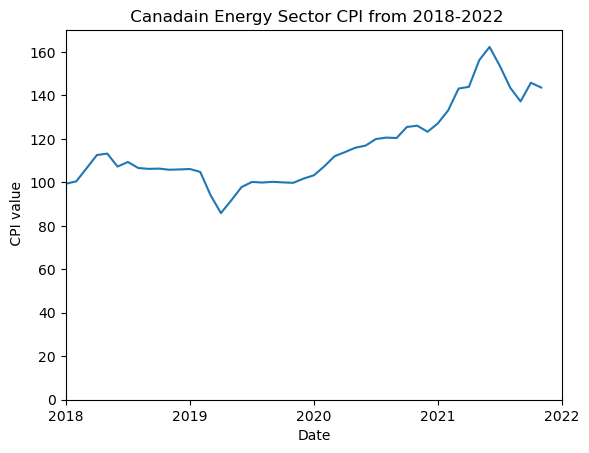

In [106]:
#plot Engery
inlaftion_rate_plot = sns.lineplot(graph_l4_Energy, y='CPI',x='TIME')
bars = (2018,2019,2020,2021,2022)
pos = np.arange(len(bars))
length = [12,24,36,48,60]
plt.xlim(12,60)
plt.xticks(length,bars)
plt.ylim(0,170)
inlaftion_rate_plot.set(xlabel="Date",ylabel=" CPI value", title=' Canadain Energy Sector CPI from 2018-2022')

#energy is fairly volitile with a high peek.

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, ' CPI value'),
 Text(0.5, 1.0, ' Canadain Food Sector CPI from 2018-2022')]

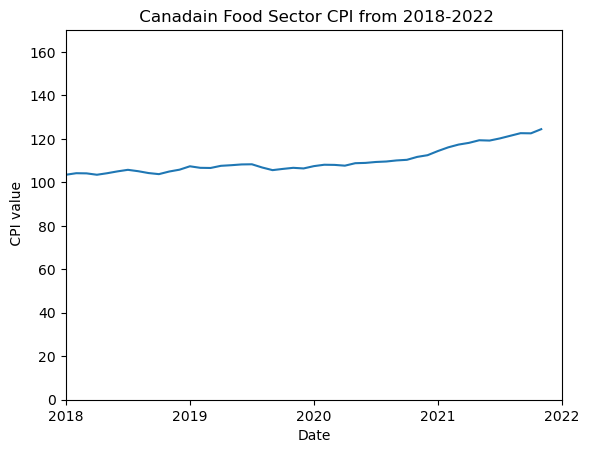

In [112]:
#plot Food
inlaftion_rate_plot = sns.lineplot(graph_l4_Food, y='CPI',x='TIME')
bars = (2018,2019,2020,2021,2022)
pos = np.arange(len(bars))
length = [12,24,36,48,60]
plt.xlim(12,60)
plt.xticks(length,bars)
plt.ylim(0,170)
inlaftion_rate_plot.set(xlabel="Date",ylabel=" CPI value", title=' Canadain Food Sector CPI from 2018-2022')

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, ' CPI value'),
 Text(0.5, 1.0, ' Canadain total of Food to Energy Sector CPI from 2018-2022')]

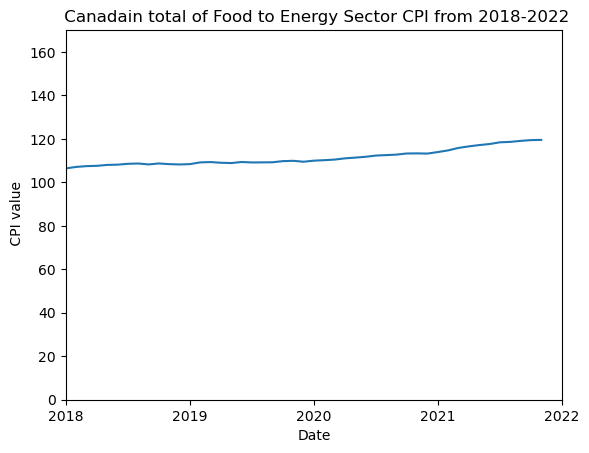

In [118]:
#plot total Food-energy
inlaftion_rate_plot = sns.lineplot(graph_l4_tot_food_Energy, y='CPI',x='TIME')
bars = (2018,2019,2020,2021,2022)
pos = np.arange(len(bars))
length = [12,24,36,48,60]
plt.xlim(12,60)
plt.xticks(length,bars)
plt.ylim(0,170)
inlaftion_rate_plot.set(xlabel="Date",ylabel=" CPI value", title=' Canadain total of Food to Energy Sector CPI from 2018-2022')

# Refining Reaserch Questions from EDA
 the amount of information contained is vastly larger then i expected when doing EDA and Canada alone could be its own topic. this includes the volitlitiy of CPI in foundational sectors of the Economy. A stable growth rate is desired and could be argued to be key in a balanced economy or strong economy. with that we can ask the follwing question and derive a estimate based on CPI weather Canada is heading in a good direction or not. by seeing canada recent trends and comparing them with other like minded countries.
 
1. __What patterns in the CPI lead to show weather Canada is weakeneing or stenghting its economy of the past 4 years?__  
2. __Is Volitlity in CPI really determental to a strong economy?__

# Reviesed Analysis Plan

in continueation of clenaing as porcessing the data needed to compare canada to like minded countries the data itself has the G7 which canda is included in and could be a good place to start with breaking down some data rom each of them and running some ridgeline graphs of the total CPI of the countries or even by catagory to see how stable the CPI is compared to Canada. we could also pull in some external recourses to help explain reasoning behind some of the patterns from news sources and articals if we find a pattern that is common throught the data. exammple Covid-19 or when the war in ukrain started. we will need to clean all the countries in a similar fashion to the EDA and then extract the inflation rates from CPI to perentages for easier time reading. somthing that is familair to the genral public.  
